In [1]:
'''
IMPORTS
'''

#Imports the pandas library to read and process data tables
import pandas as pd

#Imports numpy library to perform mathematical operations on Arrays
import numpy as np

#Imports the StandardScalar from sklearn model to normalize (scale) the features
from sklearn.preprocessing import StandardScaler

#Imports the train_test_split class from sklearn model to split the dataset
from sklearn.model_selection import train_test_split

#Imports the Decision Tree Classifier from sklearn tree
from sklearn.tree import DecisionTreeClassifier

#Imports the KNeighborsClassifier class from sklearn neighbors
from sklearn.neighbors import KNeighborsClassifier

#
from sklearn.metrics import mean_squared_error

#Imports the Logistic Regression Classifier from sklearn linear_model
from sklearn.linear_model import LogisticRegression

#Imports the accuracy_score class from sklearn metrics to test accuracy between acutal and predicted data
from sklearn.metrics import accuracy_score

#Imports metrics from sklearn
from sklearn import metrics

#Importing the "pyplot" package of "matplotlib" library of python to generate graphs and plot curves:
import matplotlib.pyplot as plt



In [2]:
#Creates a pandas Dataframe by reading the list of songs dataset from a local CSV File
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding = 'latin-1')

In [3]:
#Some feature columns have comma ',' so we must remove the commas before using the data for training and testing

change_feature_col = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 
                      'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 
                      'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins',
                      'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 
                      'Soundcloud Streams', 'Shazam Counts']

#print(df[change_feature_col])

for column in change_feature_col:
    df[column] = df[column].str.replace(',', '').astype(float)

#Replaces all NaN values in with 0
df.fillna(0, inplace=True)

In [4]:
'''
A for loop to categorize each value of All Time Rank column to "High Rank", "Mid Rank", and "Low Rank" through One Hot Encoding. 
Because there are 4600 values for rank, it will be extremly difficult for our learning algorithms to predict the exact rank
that a song will be at. As such, we use category labels to make up for that.
'''

#Removes commas and converts all values from the All Time Rank column to an integer type
df['All Time Rank'] = df['All Time Rank'].str.replace(',', '').astype(int)

#A an array to categorize into High Rank, Mid Rank, and Low Rank
rank_categories = []

#A for loop to conduct One Hot Encoding for the All Time Rank column
for rank in df['All Time Rank']:
    if rank <= 1000:
        rank_categories.append('High Rank')
    elif rank <= 3000:
        rank_categories.append('Mid Rank')
    else:
        rank_categories.append('Low Rank')

#Assigns a new set of values to the All Time Rank column
df['All Time Rank'] = rank_categories 

#ebug code
    #print(df['All Time Rank'])

In [5]:
#Let's set up a feature matrix and a label vector for the dataset

#Let's set up a feature matrix and a label vector for the dataset
feature_columns = ['Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 
                   'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes',
                   'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',	
                   'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',	'Amazon Playlist Count', 
                   'Pandora Streams', 'Pandora Track Stations',	'Soundcloud Streams', 'Shazam Counts', 'Explicit Track']

#X will be the feature matrix (dataframe) that stores all of our features' values
X = df[feature_columns]

#Y will be the label vector (dataframe) that will store all of the label values
y = df['All Time Rank']

In [6]:
#Scales down the data for the feature columns
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
#Splits up the dataset into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

In [8]:
'''
KEYVAN'S SECTION
'''

#Instantiates Decision Tree Classifer object
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=5)

#Trains the DT object
decision_tree.fit(X_train, y_train)

#Tests DT object on testing data 
y_predict = decision_tree.predict(X_test)

#Debug code
    #print('y_test: ')
    #print(y_test[:10])

    #print('\n')

    #print('y_predict: ')
    #print(y_predict[:10])

    #print('\n')

#Checks the accuracy of the actual values compared to the predicted values for DT classifier
dt_accuracy = accuracy_score(y_test, y_predict)

In [9]:
'''
ADRIAN'S SECTION
'''

#Sets up for KNN Classifer object 
k = 7
knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')

# train knn
k = 10
knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
#knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
knn.fit(X_train, y_train)

# predict and calculate accuracy
y_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)

#print(y_pred[:10])  # Print first 10 predictions
#print(y_test[:10])

In [10]:
'''
MD'S SECTION
'''
my_logreg = LogisticRegression(max_iter=5000)
# training on training set
my_logreg.fit(X_train, y_train)
# testing on testing set
y_predict_lr = my_logreg.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_predict_lr)

In [11]:
'''
Comparisons of accuracy
'''
#Compares the accuracy of all three classifiers
print('DT Classifer (1st): ' + str(round(dt_accuracy, 3) * 100) + ' % \n')
print('LR Classifer (2nd): ' + str(round(lr_accuracy, 3) * 100) + ' % \n')
print('KNN Classifer (3rd): ' + str(round(knn_accuracy, 3) * 100) + ' % ')

DT Classifer (1st): 99.6 % 

LR Classifer (2nd): 96.6 % 

KNN Classifer (3rd): 68.8 % 


In [12]:
'''
Setting up for graphs (ROC Curves)
'''

#The following line will tell Jupyter Notebook to keep the figures inside the explorer page rather than openng a new figure window:
%matplotlib inline

#Converts/maps binary values to the test labels to calculate the AUC for each classifier
y_test = y_test.map({"High Rank": 0, "Mid Rank": 1, "Low Rank": 2})


AUC: 18.85%


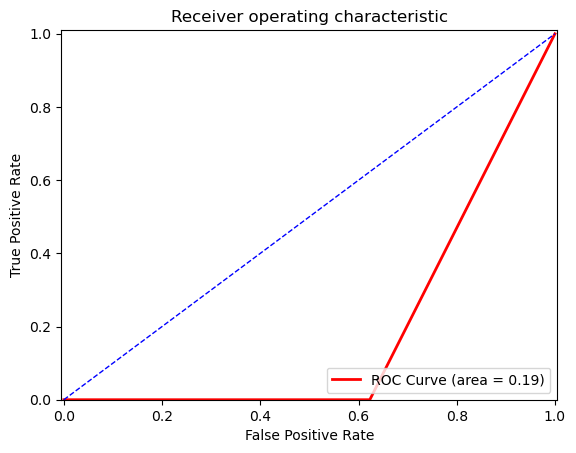

In [13]:
'''
Sets up the Roc Curve for DT Classifier
'''
#Sets up and tests accuracy for Logistic Regression Classifer object
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=5)

decision_tree.fit(X_train, y_train)

#Estimating the probability (likelihood) of Each Label: 
y_predict_prob = decision_tree.predict_proba(X_test)

#Fins fpr, tpr, and thresholds to find the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

#DT Classifier AUC
AUC = metrics.auc(fpr, tpr)

plt.figure()

#Plots Roc Curve for DT Classifier
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

#Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

#Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

print('\nAUC: ' + str(round(AUC * 100, 3)) + '%')


AUC: 37.385%


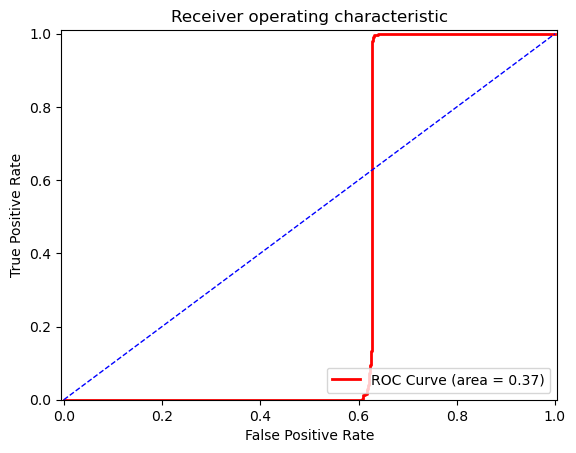

In [14]:
'''
Sets up the Roc Curve for Logistic Regression Classifier
'''
#Sets up and tests accuracy for Logistic Regression Classifer object
logistic_regression = LogisticRegression(max_iter=5000)

logistic_regression.fit(X_train, y_train)

#Estimating the probability (likelihood) of Each Label: 
y_predict_prob = logistic_regression.predict_proba(X_test)

#Fins fpr, tpr, and thresholds to find the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

#Logistic Regression AUC
AUC = metrics.auc(fpr, tpr)

plt.figure()

#Plots Roc Curve for Logistic Regression
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

#Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

#Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

print('\nAUC: ' + str(round(AUC * 100, 3)) + '%')

plt.show()

In [15]:
'''
Sets up the Roc Curve for KNN Classifier
'''



'\nSets up the Roc Curve for KNN Classifier\n'